In [1]:
import pandas as pd
import numpy as np
from utils.const import *
from utils.physics import *
import matplotlib.pyplot as plt
from copy import copy

cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [4]:
rad = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/100k.pkl")
# rad2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/100k_2.pkl")
rad2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/100k_3.pkl")
nonrad = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/nonrad.pkl")
nonrad_original = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/100k_original.pkl")
nonrad_final = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/100k_nonrad_final.pkl")
rad_final = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/100k_rad_final.pkl")
rad_stable = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/rad/100k_rad_stable.pkl")

In [6]:
rad

,Epx,Epy,Epz,Ppx,Ppy,Ppz,Gpx,Gpy,Gpz,Gpx2,Gpy2,Gpz2
0,-0.4297,-0.2920,2.0100,0.3747,0.8546,0.6012,0.0550,-0.5626,7.9928,0.0,0.0,0.0000
1,0.2981,0.3844,1.7056,-0.2994,-0.2517,0.1598,0.0013,-0.1327,8.7386,0.0,0.0,0.0000
2,-0.0604,0.9187,6.4553,-0.4470,-0.4799,0.4088,0.5074,-0.4388,3.3668,0.0,0.0,0.3731
3,0.4971,0.1291,2.0306,0.6380,-0.0330,0.4126,-1.1351,-0.0961,8.1608,0.0,0.0,0.0000
4,0.8680,-0.3008,3.0834,-0.3514,0.0317,0.2528,-0.5166,0.2691,7.2678,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0.4294,0.4618,2.7907,-0.3247,-0.4258,0.2394,-0.1047,-0.0360,7.5739,0.0,0.0,0.0000
99993,-0.1889,0.3314,1.4739,0.1014,-0.1236,0.0676,0.0875,-0.2078,8.2250,0.0,0.0,0.8376
99994,0.0971,0.6531,4.9930,-0.0279,-0.6922,0.3135,-0.0692,0.0392,5.2975,0.0,0.0,0.0000
99995,0.9068,0.3127,3.0155,-0.6991,-0.8768,1.0219,-0.2077,0.5640,6.5666,0.0,0.0,0.0000


In [5]:
def saveDVCSvars(df):
        #set up dvcs variables

        df.loc[:, "Ep"] = mag([df.Epx, df.Epy, df.Epz])
        df.loc[:, "Ee"] = getEnergy([df.Epx, df.Epy, df.Epz], me)
        df.loc[:, "Pp"] = mag([df.Ppx, df.Ppy, df.Ppz])
        df.loc[:, "Pe"] = getEnergy([df.Ppx, df.Ppy, df.Ppz], M)
        df.loc[:, "Gp"] = mag([df.Gpx, df.Gpy, df.Gpz])
        df.loc[:, "Ge"] = getEnergy([df.Gpx, df.Gpy, df.Gpz], 0)
        df.loc[:, "Gp2"] = mag([df.Gpx2, df.Gpy2, df.Gpz2])
        df.loc[:, "Ge2"] = getEnergy([df.Gpx2, df.Gpy2, df.Gpz2], 0)
        
        ele = [df['Epx'], df['Epy'], df['Epz']]
        df.loc[:, 'Ep'] = mag(ele)
        df.loc[:, 'Ee'] = getEnergy(ele, me)
        df.loc[:, 'Etheta'] = getTheta(ele)
        df.loc[:, 'Ephi'] = getPhi(ele)

        pro = [df['Ppx'], df['Ppy'], df['Ppz']]

        gam = [df['Gpx'], df['Gpy'], df['Gpz']]
        df.loc[:, 'Gp'] = mag(gam)
        df.loc[:, 'Ge'] = getEnergy(gam, 0)
        df.loc[:, 'Gtheta'] = getTheta(gam)
        df.loc[:, 'Gphi'] = getPhi(gam)

        Ppt = mag([df['Ppx'], df['Ppy'], 0])

        VGS = [-df['Epx'], -df['Epy'], pbeam - df['Epz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df["Epx"] - df["Ppx"], -df["Epy"] - df["Ppy"],
                  pbeam - df["Epz"] - df["Ppz"]]
        VmissP = [-(df["Epx"] + df["Gpx"]), -(df["Epy"] + df["Gpy"]),
                  -(-pbeam + df["Epz"] + df["Gpz"])]
        Vmiss = [-(df["Epx"] + df["Ppx"] + df["Gpx"]), -(df["Epy"] + df["Ppy"] + df["Gpy"]),
                 -(-pbeam + df["Epz"] + df["Ppz"] + df["Gpz"])]
        costheta = cosTheta(VGS, gam)

        df.loc[:, 'Mpx'], df.loc[:, 'Mpy'], df.loc[:, 'Mpz'] = Vmiss

        # binning kinematics
        df.loc[:,'Q2'] = -((ebeam - df['Ee'])**2 - mag2(VGS))
        df.loc[:,'nu'] = (ebeam - df['Ee'])
        df.loc[:,'y'] = df['nu']/ebeam
        df.loc[:,'xB'] = df['Q2'] / 2.0 / M / df['nu']
        df.loc[:,'t1'] = 2 * M * (df['Pe'] - M)
        df.loc[:,'t2'] = (M * df['Q2'] + 2 * M * df['nu'] * (df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta))\
        / (M + df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta)
        df.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df['Ee'])**2 - mag2(VGS)))

        # trento angles
        df.loc[:,'phi1'] = angle(v3l, v3h)
        df.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df['phi1'], df['phi1'])
        df.loc[:,'phi2'] = angle(v3l, v3g)
        df.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df['phi2'], df['phi2'])

        # exclusivity variables
        df.loc[:,'MM2_epg'] = (-M - ebeam + df["Ee"] +
                             df["Pe"] + df["Ge"])**2 - mag2(Vmiss)
        df.loc[:,'ME_epg'] = (M + ebeam - df["Ee"] - df["Pe"] - df["Ge"])
        df.loc[:,'MM2_ep'] = (-M - ebeam + df["Ee"] + df["Pe"])**2 - mag2(VmissG)
        df.loc[:,'MM2_eg'] = (-M - ebeam + df["Ee"] + df["Ge"])**2 - mag2(VmissP)
        df.loc[:,'MPt'] = np.sqrt((df["Epx"] + df["Ppx"] + df["Gpx"])**2 +
                                (df["Epy"] + df["Ppy"] + df["Gpy"])**2)
        df.loc[:,'coneAngle'] = angle(ele, gam)
        df.loc[:,'reconGam'] = angle(gam, VmissG)
        df.loc[:,'coplanarity'] = angle(v3h, v3g)
        return df

In [6]:
rad = saveDVCSvars(rad)
rad2 = saveDVCSvars(rad2)
nonrad = saveDVCSvars(nonrad)
nonrad_original = saveDVCSvars(nonrad_original)
nonrad_final = saveDVCSvars(nonrad_final)
rad_final = saveDVCSvars(rad_final)
rad_stable = saveDVCSvars(rad_stable)

<AxesSubplot:>

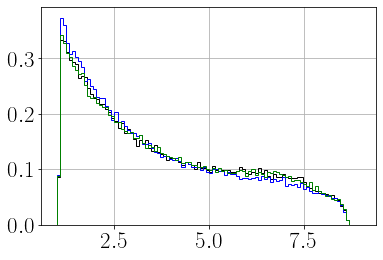

In [10]:
# rad.Ee.hist(bins= np.linspace(1, 9, 101), density=True, histtype = 'step', color = 'k')
# rad2.Ee.hist(bins= np.linspace(1, 9, 101), density=True, histtype = 'step', color = 'b')
# nonrad.Ee.hist(bins= np.linspace(1, 9, 101), density=True, histtype = 'step', color = 'r')
nonrad_final.Ee.hist(bins= np.linspace(1, 9, 101), density=True, histtype = 'step', color = 'k')
rad_final.Ee.hist(bins= np.linspace(1, 9, 101), density=True, histtype = 'step', color = 'b')
nonrad_original.Ee.hist(bins= np.linspace(1, 9, 101), density=True, histtype = 'step', color = 'g')


<AxesSubplot:>

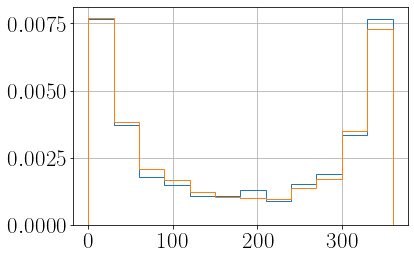

In [47]:
xBlower = 0.2
xBupper = 0.3
Q2lower = 3
Q2upper = 4
rad.loc[(rad.xB>xBlower) & (rad.xB<xBupper) & (rad.Q2>Q2lower) & (rad.Q2<Q2upper), "phi1"].hist(bins = np.linspace(0, 360, 13), histtype = 'step',density = True)
nonrad.loc[(nonrad.xB>xBlower) & (nonrad.xB<xBupper) & (nonrad.Q2>Q2lower) & (nonrad.Q2<Q2upper), "phi1"].hist(bins = np.linspace(0, 360, 13), histtype = 'step', density =True)

<AxesSubplot:>

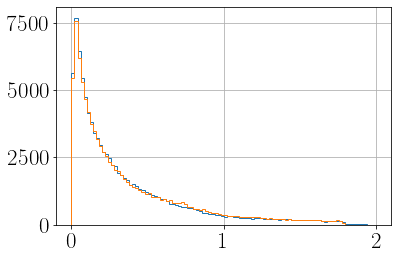

In [34]:
rad.t2.hist(bins = np.linspace(0, 2, 101), histtype = 'step')
nonrad.t2.hist(bins = np.linspace(0, 2, 101), histtype = 'step')

<AxesSubplot:>

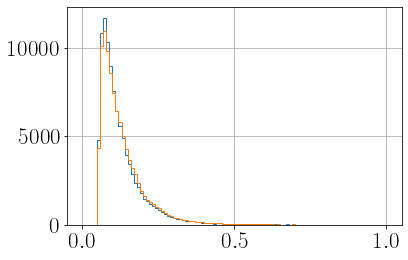

In [35]:
rad.xB.hist(bins = np.linspace(0, 1, 101), histtype = 'step')
nonrad.xB.hist(bins = np.linspace(0, 1, 101), histtype = 'step')

<AxesSubplot:>

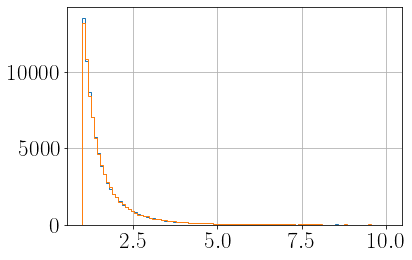

In [37]:
rad.Q2.hist(bins = np.linspace(1, 10, 101), histtype = 'step')
nonrad.Q2.hist(bins = np.linspace(1, 10, 101), histtype = 'step')

<AxesSubplot:>

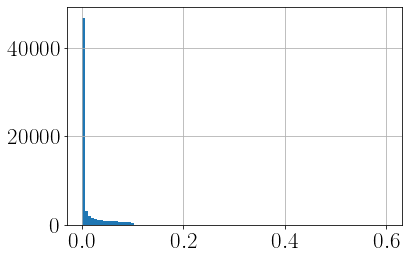

In [12]:
rad.MM2_ep.hist(bins = np.linspace(0, 0.6, 101))

<AxesSubplot:>

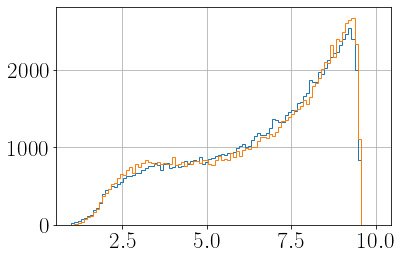

In [38]:
rad.Ge.hist(bins = np.linspace(1, 10, 101), histtype = 'step')
nonrad.Ge.hist(bins = np.linspace(1, 10, 101), histtype = 'step')

<AxesSubplot:>

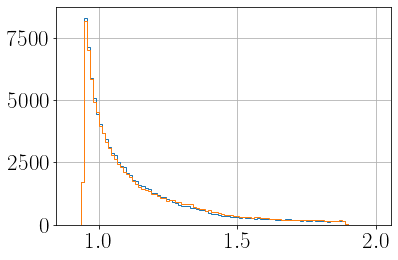

In [40]:
rad.Pe.hist(bins = np.linspace(0.9, 2, 101), histtype = 'step')
nonrad.Pe.hist(bins = np.linspace(0.9, 2, 101), histtype = 'step')

In [98]:
min(rad.loc[rad.Ge2>0,"Ge2"])

0.01

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

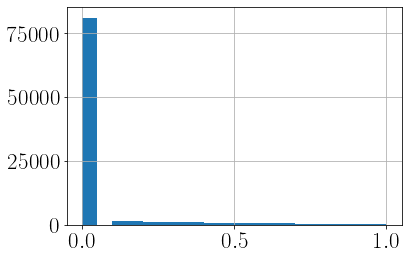

In [16]:
rad2.Ge2.hist(bins = np.linspace(0, 1, 21))
# rad.Ge2.hist(bins = np.linspace(0, 1, 21))
plt

<AxesSubplot:>

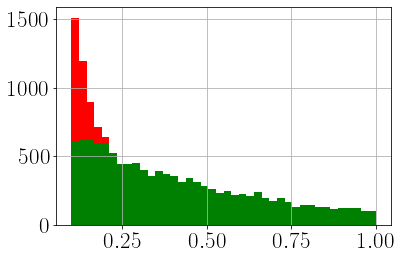

In [22]:
rad.Ge2.hist(bins = np.linspace(0.1, 1, 41), color ='r')
rad2.Ge2.hist(bins = np.linspace(0.1, 1, 41), color ='g')
nonrad.Ge2.hist(bins = np.linspace(0.1, 1, 41), histtype = 'step', color ='b')
# plt.xlabel(r"$E_{\gamma'}$"+" ["+GeV+"]")

Text(0.5, 0, "$E_{e'}$ [GeV]")

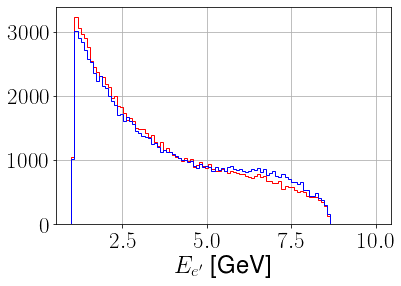

In [81]:
rad.Ee.hist(bins = np.linspace(1, 10, 101), histtype = 'step', color ='r')
nonrad.Ee.hist(bins = np.linspace(1, 10, 101), histtype = 'step', color ='b')
plt.xlabel(r"$E_{e'}$"+" ["+GeV+"]")

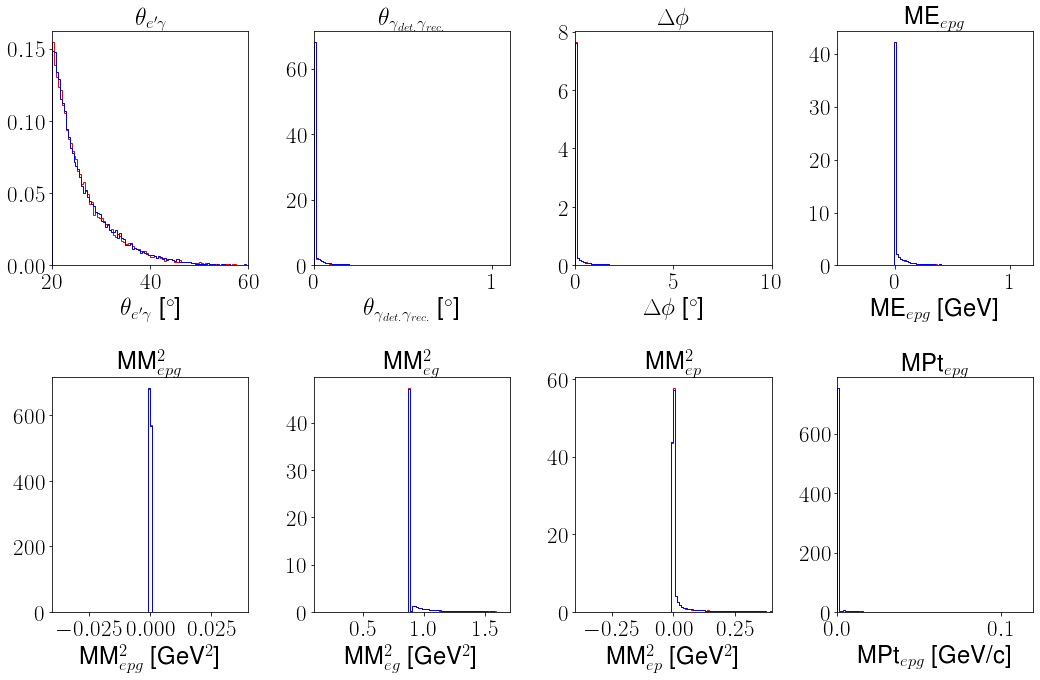

<Figure size 432x288 with 0 Axes>

In [8]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
# 		axs[yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
		axs[yind, xind].hist(rad_final[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].hist(rad_stable[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		axs[yind, xind].set_xlim([start, end])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_1.pdf")
plt.clf()

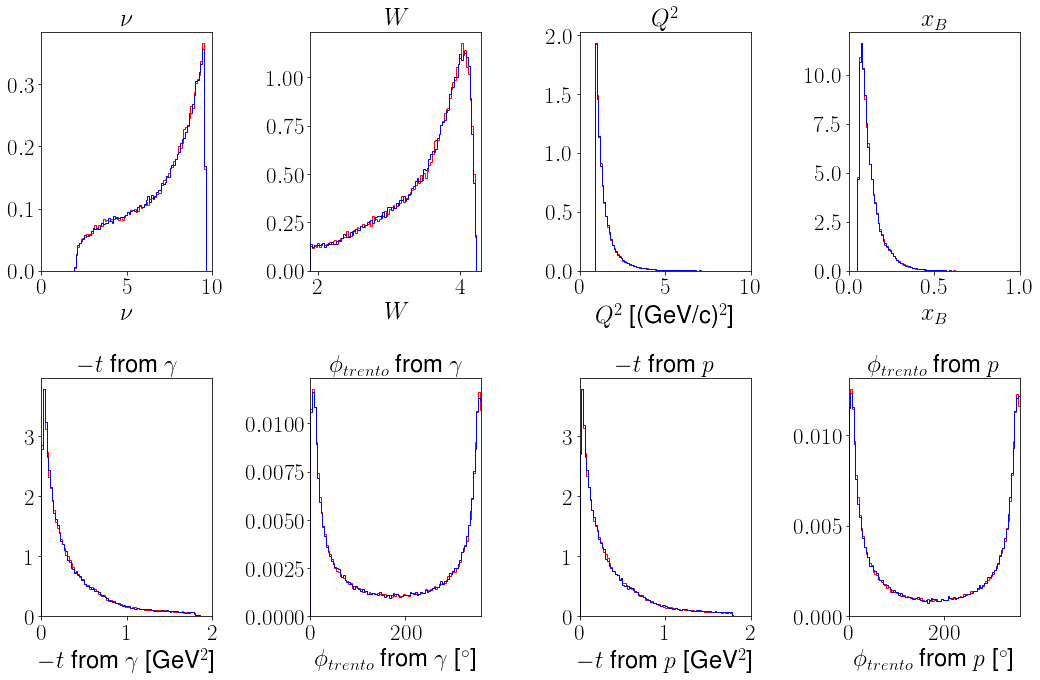

<Figure size 432x288 with 0 Axes>

In [9]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2", "t1", "phi1"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$"+" from "+r"$\gamma$", r"$\phi_{trento}$"+" from "+r"$\gamma$", r"$-t$"+" from "+r"$p$", r"$\phi_{trento}$"+" from "+r"$p$" ]
unit = [None, None, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [0, 1.9, 0, 0, 0, 0, 0 , 0]
binends = [10, 4.3, 10, 1, 2, 360, 2, 360]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
	for yind in range(0, 2):
		ind =xind+4*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
# 		axs[yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
		axs[yind, xind].hist(rad_final[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].hist(rad_stable[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_2.pdf")
plt.clf()

In [62]:
Wcheck = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/Wcheck.pkl")

In [63]:
Wcheck.loc[:, "Ep"] = mag([Wcheck.Epx, Wcheck.Epy, Wcheck.Epz])
Wcheck.loc[:, "Ee"] = getEnergy([Wcheck.Epx, Wcheck.Epy, Wcheck.Epz], me)
Wcheck.loc[:, "Pp"] = mag([Wcheck.Ppx, Wcheck.Ppy, Wcheck.Ppz])
Wcheck.loc[:, "Pe"] = getEnergy([Wcheck.Ppx, Wcheck.Ppy, Wcheck.Ppz], M)
Wcheck.loc[:, "Gp"] = mag([Wcheck.Gpx, Wcheck.Gpy, Wcheck.Gpz])
Wcheck.loc[:, "Ge"] = getEnergy([Wcheck.Gpx, Wcheck.Gpy, Wcheck.Gpz], 0)
Wcheck.loc[:, "Gp2"] = mag([Wcheck.Gpx2, Wcheck.Gpy2, Wcheck.Gpz2])
Wcheck.loc[:, "Ge2"] = getEnergy([Wcheck.Gpx2, Wcheck.Gpy2, Wcheck.Gpz2], 0)
Wcheck = saveDVCSvars(Wcheck)

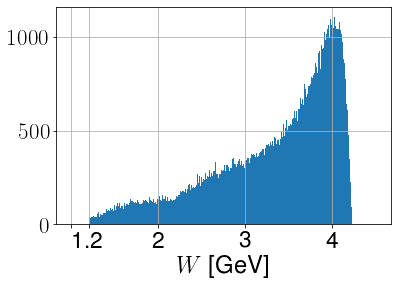

In [77]:
Wcheck.W.hist(bins = np.linspace(1.0, 4.5, 321))
plt.xlabel(r"$W$"+"\t["+GeV+"]")
plt.xticks([1, 1.2, 2, 3, 4],['', 1.2, 2, 3, 4])
plt.show()

KeyError: 'coneAngle'

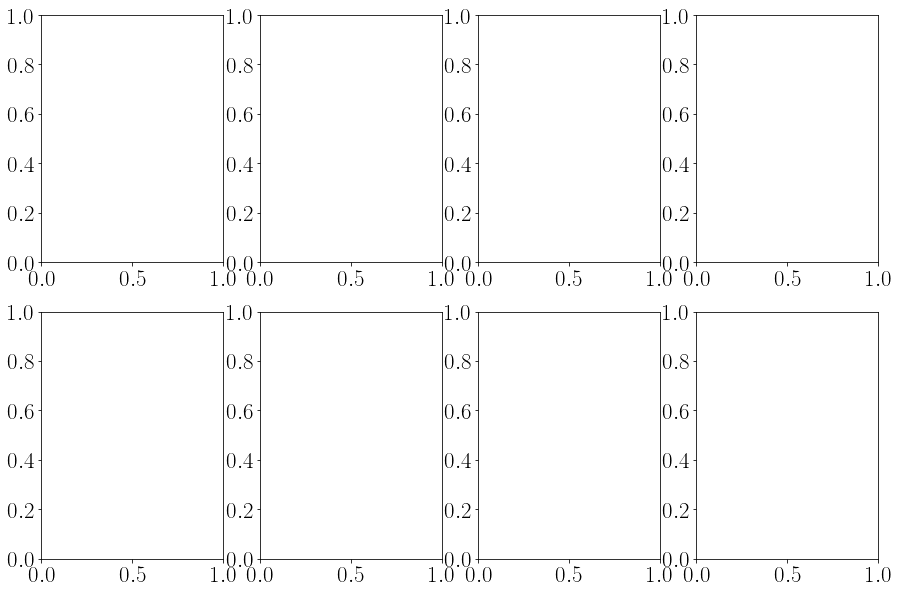

In [6]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
# 		axs[yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
		axs[yind, xind].hist(nonrad_original[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].hist(nonrad_test[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		axs[yind, xind].set_xlim([start, end])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_1.pdf")
plt.clf()

## Lower W data

In [61]:
lowW_genNoRad = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/lowW/lowW_genNoRad.pkl")
lowW_genRad = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/lowW/lowW_genRad.pkl")
lowW_recInb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/lowW/inbending/lowW.pkl")
lowW_recOutb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/lowW/outbending/lowW.pkl")

In [48]:
lowW_genNoRad

,Epx,Epy,Epz,Ppx,Ppy,Ppz,Gpx,Gpy,Gpz,Gpx2,Gpy2,Gpz2
0,-0.3781,0.8165,8.6187,0.1267,0.2370,0.7303,0.2514,-1.0535,1.2550,0.0,0.0,0.0
1,0.8597,0.4511,8.9823,-0.0152,-0.3714,0.5790,-0.8445,-0.0797,1.0427,0.0,0.0,0.0
2,0.5339,-0.9282,9.6845,-0.4123,0.8470,0.6233,-0.1216,0.0813,0.2961,0.0,0.0,0.0
3,0.3649,0.8071,8.5300,0.2912,0.0976,0.7922,-0.6561,-0.9047,1.2818,0.0,0.0,0.0
4,-1.0138,0.1789,8.6504,0.3339,-0.6168,0.7867,0.6799,0.4379,1.1669,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,-0.9645,0.3414,9.0721,0.4168,-0.2521,0.3614,0.5477,-0.0893,1.1705,0.0,0.0,0.0
9999996,-0.8782,-0.3109,8.3262,-0.2759,-0.0190,0.8254,1.1541,0.3299,1.4524,0.0,0.0,0.0
9999997,-0.9745,0.4247,8.5798,0.1745,-0.7422,1.2545,0.8000,0.3174,0.7697,0.0,0.0,0.0
9999998,0.4045,0.7999,9.4347,-0.1278,-0.7091,0.4103,-0.2767,-0.0908,0.7590,0.0,0.0,0.0


In [49]:
def saveDVCSvars(df):
        #set up dvcs variables

        df.loc[:, "Ep"] = mag([df.Epx, df.Epy, df.Epz])
        df.loc[:, "Ee"] = getEnergy([df.Epx, df.Epy, df.Epz], me)
        df.loc[:, "Pp"] = mag([df.Ppx, df.Ppy, df.Ppz])
        df.loc[:, "Pe"] = getEnergy([df.Ppx, df.Ppy, df.Ppz], M)
        df.loc[:, "Gp"] = mag([df.Gpx, df.Gpy, df.Gpz])
        df.loc[:, "Ge"] = getEnergy([df.Gpx, df.Gpy, df.Gpz], 0)
        df.loc[:, "Gp2"] = mag([df.Gpx2, df.Gpy2, df.Gpz2])
        df.loc[:, "Ge2"] = getEnergy([df.Gpx2, df.Gpy2, df.Gpz2], 0)
        
        ele = [df['Epx'], df['Epy'], df['Epz']]
        df.loc[:, 'Ep'] = mag(ele)
        df.loc[:, 'Ee'] = getEnergy(ele, me)
        df.loc[:, 'Etheta'] = getTheta(ele)
        df.loc[:, 'Ephi'] = getPhi(ele)

        pro = [df['Ppx'], df['Ppy'], df['Ppz']]

        gam = [df['Gpx'], df['Gpy'], df['Gpz']]
        df.loc[:, 'Gp'] = mag(gam)
        df.loc[:, 'Ge'] = getEnergy(gam, 0)
        df.loc[:, 'Gtheta'] = getTheta(gam)
        df.loc[:, 'Gphi'] = getPhi(gam)

        Ppt = mag([df['Ppx'], df['Ppy'], 0])

        VGS = [-df['Epx'], -df['Epy'], pbeam - df['Epz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df["Epx"] - df["Ppx"], -df["Epy"] - df["Ppy"],
                  pbeam - df["Epz"] - df["Ppz"]]
        VmissP = [-(df["Epx"] + df["Gpx"]), -(df["Epy"] + df["Gpy"]),
                  -(-pbeam + df["Epz"] + df["Gpz"])]
        Vmiss = [-(df["Epx"] + df["Ppx"] + df["Gpx"]), -(df["Epy"] + df["Ppy"] + df["Gpy"]),
                 -(-pbeam + df["Epz"] + df["Ppz"] + df["Gpz"])]
        costheta = cosTheta(VGS, gam)

        df.loc[:, 'Mpx'], df.loc[:, 'Mpy'], df.loc[:, 'Mpz'] = Vmiss

        # binning kinematics
        df.loc[:,'Q2'] = -((ebeam - df['Ee'])**2 - mag2(VGS))
        df.loc[:,'nu'] = (ebeam - df['Ee'])
        df.loc[:,'y'] = df['nu']/ebeam
        df.loc[:,'xB'] = df['Q2'] / 2.0 / M / df['nu']
        df.loc[:,'t1'] = 2 * M * (df['Pe'] - M)
        df.loc[:,'t2'] = (M * df['Q2'] + 2 * M * df['nu'] * (df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta))\
        / (M + df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta)
        df.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df['Ee'])**2 - mag2(VGS)))

        # trento angles
        df.loc[:,'phi1'] = angle(v3l, v3h)
        df.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df['phi1'], df['phi1'])
        df.loc[:,'phi2'] = angle(v3l, v3g)
        df.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df['phi2'], df['phi2'])

        # exclusivity variables
        df.loc[:,'MM2_epg'] = (-M - ebeam + df["Ee"] +
                             df["Pe"] + df["Ge"])**2 - mag2(Vmiss)
        df.loc[:,'ME_epg'] = (M + ebeam - df["Ee"] - df["Pe"] - df["Ge"])
        df.loc[:,'MM2_ep'] = (-M - ebeam + df["Ee"] + df["Pe"])**2 - mag2(VmissG)
        df.loc[:,'MM2_eg'] = (-M - ebeam + df["Ee"] + df["Ge"])**2 - mag2(VmissP)
        df.loc[:,'MPt'] = np.sqrt((df["Epx"] + df["Ppx"] + df["Gpx"])**2 +
                                (df["Epy"] + df["Ppy"] + df["Gpy"])**2)
        df.loc[:,'coneAngle'] = angle(ele, gam)
        df.loc[:,'reconGam'] = angle(gam, VmissG)
        df.loc[:,'coplanarity'] = angle(v3h, v3g)
        return df

In [50]:
def saveGenDVCSvars(df):
        #set up dvcs variables
        ele = [df['GenEpx'], df['GenEpy'], df['GenEpz']]
        df.loc[:, 'GenEp'] = mag(ele)
        df.loc[:, 'GenEe'] = getEnergy(ele, me)
        df.loc[:, 'GenEtheta'] = getTheta(ele)
        df.loc[:, 'GenEphi'] = getPhi(ele)

        pro = [df['GenPpx'], df['GenPpy'], df['GenPpz']]
        df.loc[:, 'GenPp'] = mag(pro)
        df.loc[:, 'GenPe'] = getEnergy(pro, 0)
        df.loc[:, 'GenPtheta'] = getTheta(pro)
        df.loc[:, 'GenPphi'] = getPhi(pro)

        gam = [df['GenGpx'], df['GenGpy'], df['GenGpz']]
        df.loc[:, 'GenGp'] = mag(gam)
        df.loc[:, 'GenGe'] = getEnergy(gam, 0)
        df.loc[:, 'GenGtheta'] = getTheta(gam)
        df.loc[:, 'GenGphi'] = getPhi(gam)

        Ppt = mag([df['GenPpx'], df['GenPpy'], 0])

        VGS = [-df['GenEpx'], -df['GenEpy'], pbeam - df['GenEpz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df["GenEpx"] - df["GenPpx"], -df["GenEpy"] - df["GenPpy"],
                  pbeam - df["GenEpz"] - df["GenPpz"]]
        VmissP = [-(df["GenEpx"] + df["GenGpx"]), -(df["GenEpy"] + df["GenGpy"]),
                  -(-pbeam + df["GenEpz"] + df["GenGpz"])]
        Vmiss = [-(df["GenEpx"] + df["GenPpx"] + df["GenGpx"]), -(df["GenEpy"] + df["GenPpy"] + df["GenGpy"]),
                 -(-pbeam + df["GenEpz"] + df["GenPpz"] + df["GenGpz"])]
        costheta = cosTheta(VGS, gam)

        df.loc[:, 'GenMpx'], df.loc[:, 'GenMpy'], df.loc[:, 'GenMpz'] = Vmiss

        # binning kinematics
        df.loc[:,'GenQ2'] = -((ebeam - df['GenEe'])**2 - mag2(VGS))
        df.loc[:,'Gennu'] = (ebeam - df['GenEe'])
        df.loc[:,'Geny'] = df['Gennu']/ebeam
        df.loc[:,'GenxB'] = df['GenQ2'] / 2.0 / M / df['Gennu']
        df.loc[:,'Gent1'] = 2 * M * (df['GenPe'] - M)
        df.loc[:,'Gent2'] = (M * df['GenQ2'] + 2 * M * df['Gennu'] * (df['Gennu'] - np.sqrt(df['Gennu'] * df['Gennu'] + df['GenQ2']) * costheta))\
        / (M + df['Gennu'] - np.sqrt(df['Gennu'] * df['Gennu'] + df['GenQ2']) * costheta)
        df.loc[:,'GenW'] = np.sqrt(np.maximum(0, (ebeam + M - df['GenEe'])**2 - mag2(VGS)))

        # trento angles
        df.loc[:,'Genphi1'] = angle(v3l, v3h)
        df.loc[:,'Genphi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df['Genphi1'], df['Genphi1'])
        df.loc[:,'Genphi2'] = angle(v3l, v3g)
        df.loc[:,'Genphi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df['Genphi2'], df['Genphi2'])

        # exclusivity variables
        df.loc[:,'GenMM2_epg'] = (-M - ebeam + df["GenEe"] +
                             df["GenPe"] + df["GenGe"])**2 - mag2(Vmiss)
        df.loc[:,'GenME_epg'] = (M + ebeam - df["GenEe"] - df["GenPe"] - df["GenGe"])
        df.loc[:,'GenMM2_ep'] = (-M - ebeam + df["GenEe"] + df["GenPe"])**2 - mag2(VmissG)
        df.loc[:,'GenMM2_eg'] = (-M - ebeam + df["GenEe"] + df["GenGe"])**2 - mag2(VmissP)
        df.loc[:,'GenMPt'] = np.sqrt((df["GenEpx"] + df["GenPpx"] + df["GenGpx"])**2 +
                                (df["GenEpy"] + df["GenPpy"] + df["GenGpy"])**2)
        df.loc[:,'GenconeAngle'] = angle(ele, gam)
        df.loc[:,'GenreconGam'] = angle(gam, VmissG)
        df.loc[:,'Gencoplanarity'] = angle(v3h, v3g)
        return df

In [62]:
lowW_genNoRad = saveDVCSvars(lowW_genNoRad)
lowW_genRad = saveDVCSvars(lowW_genRad)

In [63]:
lowW_recInb = saveGenDVCSvars(lowW_recInb)
lowW_recOutb = saveGenDVCSvars(lowW_recOutb)

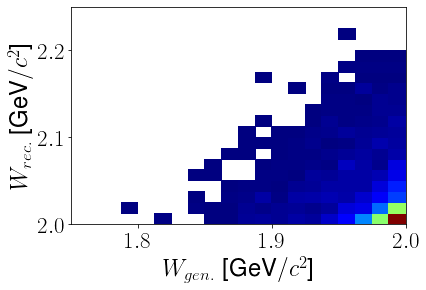

In [53]:
plt.hist2d(lowW_recInb.GenW, lowW_recInb.W, bins = [np.linspace(1.75,2, 21), np.linspace(2,2.25,21)], cmap = cmap, cmin =1)
plt.xlabel(r"$W_{gen.}$"+" ["+GeV+r"$/c^2$"+"]")
plt.ylabel(r"$W_{rec.}$"+" ["+GeV+r"$/c^2$"+"]")
plt.show()

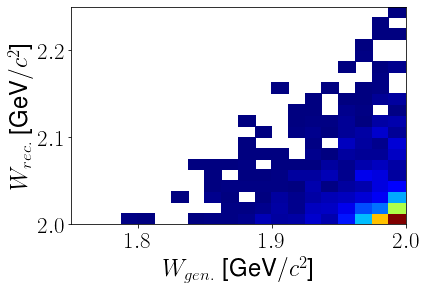

In [54]:
plt.hist2d(lowW_recOutb.GenW, lowW_recOutb.W, bins = [np.linspace(1.75,2, 21), np.linspace(2,2.25,21)], cmap = cmap, cmin =1)
plt.xlabel(r"$W_{gen.}$"+" ["+GeV+r"$/c^2$"+"]")
plt.ylabel(r"$W_{rec.}$"+" ["+GeV+r"$/c^2$"+"]")
plt.show()

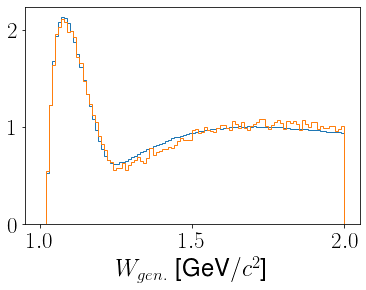

In [65]:
plt.hist(lowW_genNoRad.W, bins = np.linspace(1, 2, 101), density = True, histtype = 'step')
plt.hist(lowW_genRad.W, bins = np.linspace(1, 2, 101), density = True, histtype = 'step')
plt.xlabel(r"$W_{gen.}$"+" ["+GeV+r"$/c^2$"+"]")
plt.show()

In [45]:
len(lowW_recOutb.loc[lowW_recOutb.GenW<1.9])

52

In [46]:
len(lowW_recInb.loc[lowW_recInb.GenW<1.9])

63

In [68]:
len(lowW_genRad)

99976

In [4]:
phitest = pd.read_pickle("/Users/sangbaek/CLAS12/dvcs/rad2/dvcsgen.pkl")

In [6]:
phitest = saveDVCSvars(phitest)

In [7]:
phitest

,Epx,Epy,Epz,Ppx,Ppy,Ppz,Gpx,Gpy,Gpz,Gpx2,...,phi1,phi2,MM2_epg,ME_epg,MM2_ep,MM2_eg,MPt,coneAngle,reconGam,coplanarity
0,-0.1154,0.4343,1.5724,0.0473,-0.0680,0.0776,0.0682,-0.3663,8.9541,0.0,...,20.917652,20.857589,-1.832055e-08,-0.000041,0.001070,0.880302,1.000000e-04,18.326054,0.000635,0.060063
1,-0.0955,0.4842,0.9784,-0.0012,-0.1581,0.1483,0.0967,-0.3261,9.4773,0.0,...,347.811161,347.811161,3.158739e-09,0.000056,0.001066,0.880463,5.721958e-17,28.814493,0.000000,0.000000
2,0.8719,-0.3656,4.2061,-0.7386,-0.5076,0.7484,-0.1333,0.8731,4.6110,0.0,...,63.839051,73.834142,3.310433e-05,1.038516,0.174115,2.437207,1.000000e-04,20.491921,1.957001,9.995091
3,0.3726,0.5597,5.1480,-0.9029,-0.7910,0.9242,0.5302,0.2313,4.5318,0.0,...,343.192236,343.195609,-9.877504e-09,0.000011,-0.000005,0.880575,1.000000e-04,4.144721,0.001246,0.003374
4,0.6408,-0.0485,1.6182,-0.1239,0.2022,0.1868,-0.5169,-0.1537,8.7990,0.0,...,303.055456,303.055457,1.225060e-10,-0.000011,-0.000195,0.880333,0.000000e+00,24.965864,0.000000,0.000000
5,0.3879,0.5313,5.0387,-0.1730,-0.8029,0.4377,-0.2149,0.2716,5.1276,0.0,...,25.684042,25.684042,8.354860e-10,-0.000029,-0.000297,0.880278,6.206335e-17,7.403027,0.000000,0.000000
6,0.5270,-0.4706,2.5190,0.0441,0.0795,0.1424,-0.5711,0.3912,7.9426,0.0,...,274.889427,274.850923,-9.938089e-09,-0.000008,-0.000047,0.880355,1.000000e-04,20.617567,0.000718,0.038504
7,-0.0940,0.3619,1.3688,0.1457,-0.5342,0.2264,-0.0517,0.1723,9.0088,0.0,...,0.708041,0.708041,5.388598e-10,-0.000023,-0.000418,0.880303,6.938894e-18,14.135394,0.000001,0.000000
8,-0.6137,-0.4132,6.0474,0.2806,0.2719,0.1489,0.3330,0.1413,4.4078,0.0,...,10.948896,10.937289,-1.643945e-08,-0.000060,0.000287,0.880206,1.000000e-04,11.615093,0.001390,0.011607
9,0.4140,0.3854,3.6287,0.0339,-0.0334,0.0712,-0.4479,-0.3520,6.9041,0.0,...,99.319858,99.319857,3.654377e-10,0.000019,0.000265,0.880391,7.850462e-17,13.565737,0.000000,0.000001


In [9]:
phi_arrays = np.linspace(0,9,10)*0.6+0.6

In [21]:
# rc_arrays = [0.98200692999898498, 0.96866187995184139, 0.95478871643861218, 0.94516370490924340, 0.94096289997917526, 0.94705195283642118, 0.94955417099356809, 0.96182257612351774, 0.97654551552995850, 0.98231284550970954]
phi_arrays = [0.3, 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]
rc_arrays = [0.90075078402217112,0.94795044173476306, 0.91695050059716654 ,  0.88703679098540933, 0.86925610853597612 , 0.86204313332051086, 0.86459042485627258, 0.87724944630345880, 0.90125462777483600, 0.93703753404138934, 0.89971184482786115]

In [22]:
phi_arrays

[0.3, 0.6, 1.2, 1.8, 2.4, 3.0, 3.6, 4.2, 4.8, 5.4, 6.0]

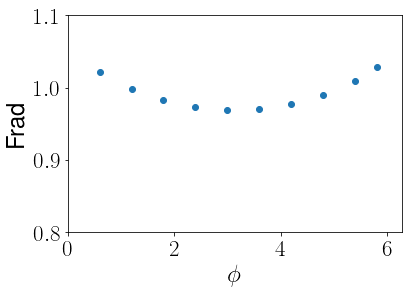

In [33]:
plt.scatter(phi_arrays, rc_arrays, marker='o')
plt.xlim([0,2*np.pi])
plt.ylim([0.8,1.1])
plt.xlabel(r"$\phi$")
plt.ylabel("Frad")
plt.show()

In [29]:
phi_arrays = [0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 5.8 ]
rc_arrays = [1.0131358755523272, 0.99927549501300328, 0.98843929273222897, 0.98178133405144563,0.97953804989176263,0.98047545590486496,0.98523707115198933, 0.99378645166344559,1.0068879571579301,1.0148421663115363]

In [30]:
print(len(rc_arrays))

10


In [32]:
rc_arrays = [1.0220752859535671, 0.99791775626377099, 0.98224469691697358, 0.97308886165473596, 0.96937644842186810, 0.97043843848814793, 0.97718142725370005, 0.98985246985002051, 1.0094998383433673, 1.0284365532861195]